# Business Case: Inventory management. 
Keeping Inventory of spare in various service centre to the market 
demand is always a challenge as most service centres spends significant 
amount in spare parts inventory costs. In spite of this, 
availability of spare parts is been one of the problem areas.

## Project Goal:
Create Predictive model for inventory forecasting so that service centre achieve JIT standards.

## Contents

- [Import Stuff](#import-stuff)
- [Load the Data](#load-the-data)
- [Basic EDA](#basic-eda)
- [Data Preprocessing](#data-preprocessing)
- [Advanced EDA](#advanced-eda)
- [Time Series Analysis](#time-series-analysis)
- [Time Series Forecasting](#time-series-forecasting)
- [Model Evaluation](#models-evaluation)
- [Multivariate Analysis](#induct-exogenous-variable-in-sarimax-model)

## Import Stuff

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [2]:
# Import Libraries

!pip install pymysql

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install mysql-connector

In [4]:
# import os
import mysql.connector
import pandas as pd
import numpy as np

In [5]:
## making connections to database server
connection=mysql.connector.connect(host = '18.136.157.135',
                                      user=' dm_usdata_sql ',
                                  password='37z<49REb&mKnl4AV!vJ')

In [6]:
## Check the number of databases available on the server
my_databases = connection.cursor()
my_databases.execute('show databases')
results = my_databases.fetchall()
for i in results:
    print(i)

('information_schema',)
('project_service_data',)


In [7]:
## connecting the database
connection=mysql.connector.connect(host='18.136.157.135',
                                  user=' dm_usdata_sql ',
                                  password='37z<49REb&mKnl4AV!vJ',
                                  database='project_service_data')

In [8]:
my_tables=pd.read_sql_query('show tables',connection)
print(my_tables)

  Tables_in_project_service_data
0                   service_data


In [9]:
query = "select * from service_data"
data = pd.read_sql(query,connection)
print(data.shape)
#pd.set_option("display.max_rows", None)
data

(28482, 7)


,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL
...,...,...,...,...,...,...,...
28477,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28478,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28479,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,OIL FILTER
28480,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,DISC OIL


In [10]:
# size of data
data.shape

(28482, 7)

In [11]:
# getting first 10 records
data.head(10)

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL
5,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CHAIN LUBRICATION
6,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,4 WAY SWITCH
7,31-05-17,31-05-17,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717,ENGINE OIL
8,31-05-17,31-05-17,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717,3M OIL
9,31-05-17,31-05-17,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717,CHAIN LUBRICATION


## Basic EDA

In [12]:
# columns
data.columns

Index(['invoice_date', 'job_card_date', 'business_partner_name', 'vehicle_no',
       'vehicle_model', 'current_km_reading', 'invoice_line_text'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   invoice_date           28482 non-null  object
 1   job_card_date          28482 non-null  object
 2   business_partner_name  28482 non-null  object
 3   vehicle_no             28482 non-null  object
 4   vehicle_model          28482 non-null  object
 5   current_km_reading     28482 non-null  object
 6   invoice_line_text      28476 non-null  object
dtypes: object(7)
memory usage: 1.5+ MB


Few null values are there in 'invoice_line_text'

In [14]:
# Handling nulls
data.isnull().sum()

invoice_date             0
job_card_date            0
business_partner_name    0
vehicle_no               0
vehicle_model            0
current_km_reading       0
invoice_line_text        6
dtype: int64

In [15]:
100* data.isnull().sum()/data.shape[0]

invoice_date             0.000000
job_card_date            0.000000
business_partner_name    0.000000
vehicle_no               0.000000
vehicle_model            0.000000
current_km_reading       0.000000
invoice_line_text        0.021066
dtype: float64

0.12% records of invoice_line_text are nulls => dropping those rows

In [16]:
data = data[pd.notnull(data.invoice_line_text)].reset_index(drop=True)
data.head()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [17]:
data.shape

(28476, 7)

In [18]:
data.columns

Index(['invoice_date', 'job_card_date', 'business_partner_name', 'vehicle_no',
       'vehicle_model', 'current_km_reading', 'invoice_line_text'],
      dtype='object')

In [19]:
# dropping redundant columns ['invoice_date','job_card_date',  'business_partner_name', 'vehicle_no']
data = data[['job_card_date', 'vehicle_model', 'invoice_line_text']]
data.shape

(28476, 3)

In [20]:
grouped_data = data.groupby(['vehicle_model'])['invoice_line_text'].count().reset_index()
grouped_data.rename(columns={'invoice_line_text': 'count'}, inplace=True)
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data

,vehicle_model,count
12,BAJAJ PULSAR 150,8631
2,BAJAJ AVENGER STREET 220,4212
14,BAJAJ PULSAR 220,2655
13,BAJAJ PULSAR 180,2252
18,BAJAJ PULSAR NS 200,2204
5,BAJAJ CT 100,1432
7,BAJAJ DISCOVER 125,1346
0,BAJAJ AVENGER STREET,1111
11,BAJAJ PLATINA,844
23,BAJAJ V150,686


In [21]:
grouped_data = data.groupby(['invoice_line_text'])['vehicle_model'].count().reset_index()
grouped_data.rename(columns={'vehicle_model': 'count'}, inplace=True)
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data

,invoice_line_text,count
149,ENGINE OIL,3802
77,CHAIN LUBRICATION,3441
210,GENERAL SERVICE,2142
11,AIR FILTER,1715
3,3M OIL,1628
...,...,...
266,KICKER RUBBER,1
273,LEVER BOLT,1
274,LEVER RUBBER,1
276,LIGHT FITTING CHARGE,1


In [22]:
data['invoice_line_text'].nunique()

503

In [23]:
# printing all items from invoice_line_text
for item in data.invoice_line_text.unique():
    print(f"'{item}',")

'ENGINE OIL',
'POLISH',
'CONSUMABLES',
'COOLANT OIL',
'CHAIN LUBRICATION',
'4 WAY SWITCH',
'3M OIL',
'GENERAL SERVICE',
'OIL FILTER',
'INDICATOR',
'HEAD REST',
'VALVE GUIDE',
'TIMMING CHAIN',
'FOOT REST',
'LOW BEAM BULB',
'VALVE GRAINDING',
'DISC PAD',
'LOADING GEAR',
'PACKING KIT',
'TIMMING CHAIN PAD',
'TENSIONER',
'CLUTCH BELL REST',
'CLUTCH ASSEMBLY',
'VALVE KIT',
'SPARK PLUG',
'ONE WAY CLUTCH',
'BORE KIT',
'AIR FILTER',
'HEAD RUBBER',
'CLUTCH CABLE',
'CRANK SHAFT',
'BRAKE ADJUSTMENT',
'BRAKE SHOE',
'AIR FILTER CHECKUP',
'DRUM BOLT WASHER',
'TANK CLEANING',
'FORK BEND',
'GEAR SHAFT',
'CLUTCH COVER GASKET',
'INDICATOR BULB',
'GEAR LEVER',
'HANDLEBAR',
'CRASH GUARD',
'FORK OIL SEAL',
'FORK OIL',
'SIDE SHIELD',
'VISIOR',
'FORK CONE SET',
'HEAD LIGHT DOOM',
'TANK ASSEMBLY',
'Clutch cable',
'DISC LEVER',
'CARBURETOR CLEANING',
'SEAT COVER',
'BUZZER',
'TAIL LAMP BULB',
'DISC OIL',
'DISC OVERHUAL',
'MASTER ASSEMBLY',
'CHAIN COVER RUBBER',
'ENGINE GUARD',
'CLUTCH CAM ',
'DOOM',
'WHEEL RUBBE

## Data Preprocessing

In [24]:
# data cleaning
data['invoice_line_text'] = data['invoice_line_text'].str.replace('BULB ', 'BULB')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('OVERHUAL', 'OVERHAUL')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('WIELDING', 'WELDING')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('ENGINE OIL TOPUP', 'ENGINE OIL')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('ASSEBLY', 'ASSEMBLY')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('GRIP HANDLE', 'HANDLE GRIPPER')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('HANDLEBAR', 'HANDLE BAR')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('NUMBER PLATE WITH STICKERS', 'NUMBER PLATE')



In [25]:
service_related_tokens = [
'OVERHAUL', 
'WELDING',
'SERVICE', 
'WORK',
'PUNCHER',
'REBORE',
'DENT',
'RC CARD',
'TAX',
'ENGINE WORK',
'CHECK',
'LABOUR',
'CHARGE',
'FEES',
'PAYMENT',
'STICKERS'
'ADJUSTMENT',
'REGISTOR',
'INSURANCE',
'ADJUSTMENT',
'REMOVAL', 
'THREADING', 
'CLEANING',
]
services = []
for item in data.invoice_line_text.unique():
    try:
        if sum([item.find(token)!= -1 for token in service_related_tokens]) > 0:
            services.append(item)
    except:
        print(item)
        
need_to_be_removed_in_services = [
'PETROL',
'VALVE GRAINDING',
'CHAIN LUBRICATION',
'ENGINE RE CONDITION',
'HEAD LIGHT WIRING',
'EX SHOW ROOM'
]
services.extend(need_to_be_removed_in_services)

In [26]:
len(services)

67

In [27]:
for item in data.invoice_line_text.unique():
#      if item not in services and item.find('EX SHOW ROOM')!=-1:
    if item not in services:
        print(item)
#         print(f"'{item}',")

ENGINE OIL
POLISH
CONSUMABLES
COOLANT OIL
4 WAY SWITCH
3M OIL
OIL FILTER
INDICATOR
HEAD REST
VALVE GUIDE
TIMMING CHAIN
FOOT REST
LOW BEAM BULB
DISC PAD
LOADING GEAR
PACKING KIT
TIMMING CHAIN PAD
TENSIONER
CLUTCH BELL REST
CLUTCH ASSEMBLY
VALVE KIT
SPARK PLUG
ONE WAY CLUTCH
BORE KIT
AIR FILTER
HEAD RUBBER
CLUTCH CABLE
CRANK SHAFT
BRAKE SHOE
DRUM BOLT WASHER
FORK BEND
GEAR SHAFT
CLUTCH COVER GASKET
INDICATOR BULB
GEAR LEVER
HANDLE BAR
CRASH GUARD
FORK OIL SEAL
FORK OIL
SIDE SHIELD
VISIOR
FORK CONE SET
HEAD LIGHT DOOM
TANK ASSEMBLY
Clutch cable
DISC LEVER
SEAT COVER
BUZZER
TAIL LAMP BULB
DISC OIL
MASTER ASSEMBLY
CHAIN COVER RUBBER
ENGINE GUARD
CLUTCH CAM 
DOOM
WHEEL RUBBER
bore kit
ENGINE BEARING
CRANK RESET
CARBURETOR DIAPHRAGM RUBBER
CLUTCH LEVER
DRUM BOLT
LOCK SET
RIGHT SHIELD CAP
SWITCH
SHOCK ABSORBER
STEP HOLDER
ACCELATOR CABLE
JALL SCREW
TANK COVER
HANDLE LOCK
GRIPPER
PARKING BULB
WIND SHIELD
SPEEDOMETER CAP
HEAD LIGHT STAY
CONE SET
DOOM SCREW KIT
DISK PAD
HEAD LIGHT BULB
CALIPER AS

In [28]:
# dropping rows related to services
data = data[~data.invoice_line_text.isin(services)]
data = data.reset_index(drop=True)
data.shape

(21346, 3)

In [29]:
data.head()

,job_card_date,vehicle_model,invoice_line_text
0,30-05-17,BAJAJ AVENGER STREET 220,ENGINE OIL
1,31-05-17,BAJAJ PULSAR NS 200,ENGINE OIL
2,31-05-17,BAJAJ PULSAR NS 200,POLISH
3,31-05-17,BAJAJ PULSAR NS 200,CONSUMABLES
4,31-05-17,BAJAJ PULSAR NS 200,COOLANT OIL


In [30]:
# renaming some columns
data.rename(columns={"job_card_date":"date", "invoice_line_text":"spare_part"}, inplace=True)

In [31]:
# changing object to datetime datatype
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%y')

In [32]:
data.head()

,date,vehicle_model,spare_part
0,2017-05-30,BAJAJ AVENGER STREET 220,ENGINE OIL
1,2017-05-31,BAJAJ PULSAR NS 200,ENGINE OIL
2,2017-05-31,BAJAJ PULSAR NS 200,POLISH
3,2017-05-31,BAJAJ PULSAR NS 200,CONSUMABLES
4,2017-05-31,BAJAJ PULSAR NS 200,COOLANT OIL


## Advanced EDA

In [33]:
# Calculate the counts of unique elements of invoice_line_text
value_counts = data['spare_part'].value_counts()

# Display the value counts
print(value_counts)


ENGINE OIL              3807
AIR FILTER              1715
3M OIL                  1628
CONSUMABLES             1595
POLISH                  1245
                        ... 
REGISTER EXPENSES          1
SWITCH                     1
MAGNET COVER PACKING       1
CLUTCH OUTLET PIPE         1
HELMET                     1
Name: spare_part, Length: 432, dtype: int64


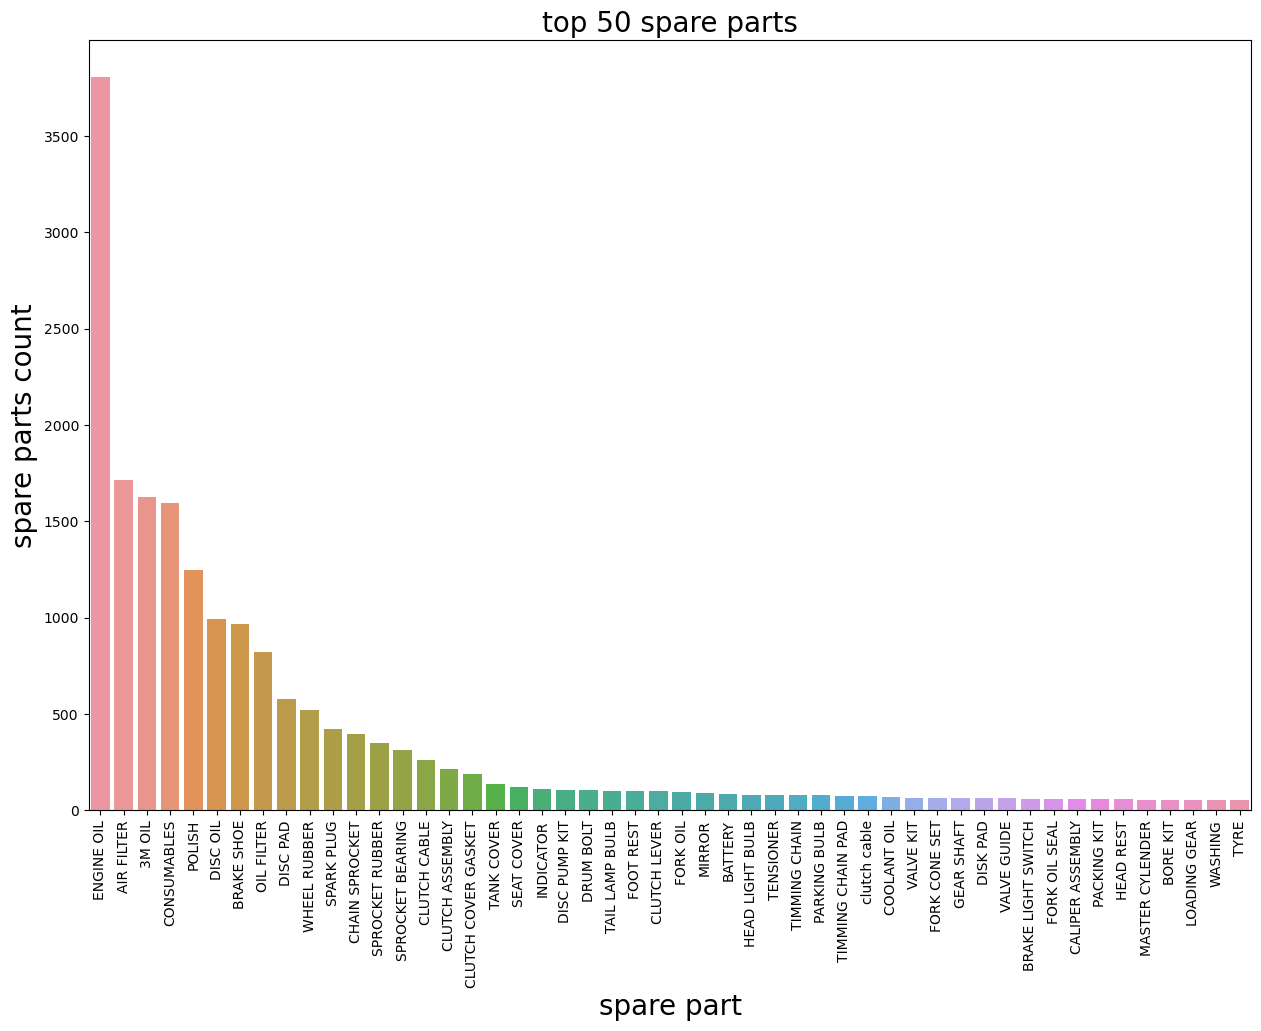

In [34]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Create the countplot
sns.countplot(data=data, x='spare_part',
              order=data['spare_part'].value_counts().index[:50],
              ax=ax)

# Set titles and labels with customized fontsizes
ax.set_title('top 50 spare parts', fontsize=20)
ax.set_ylabel('spare parts count', fontsize=20)
ax.set_xlabel('spare part', fontsize=20)

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()


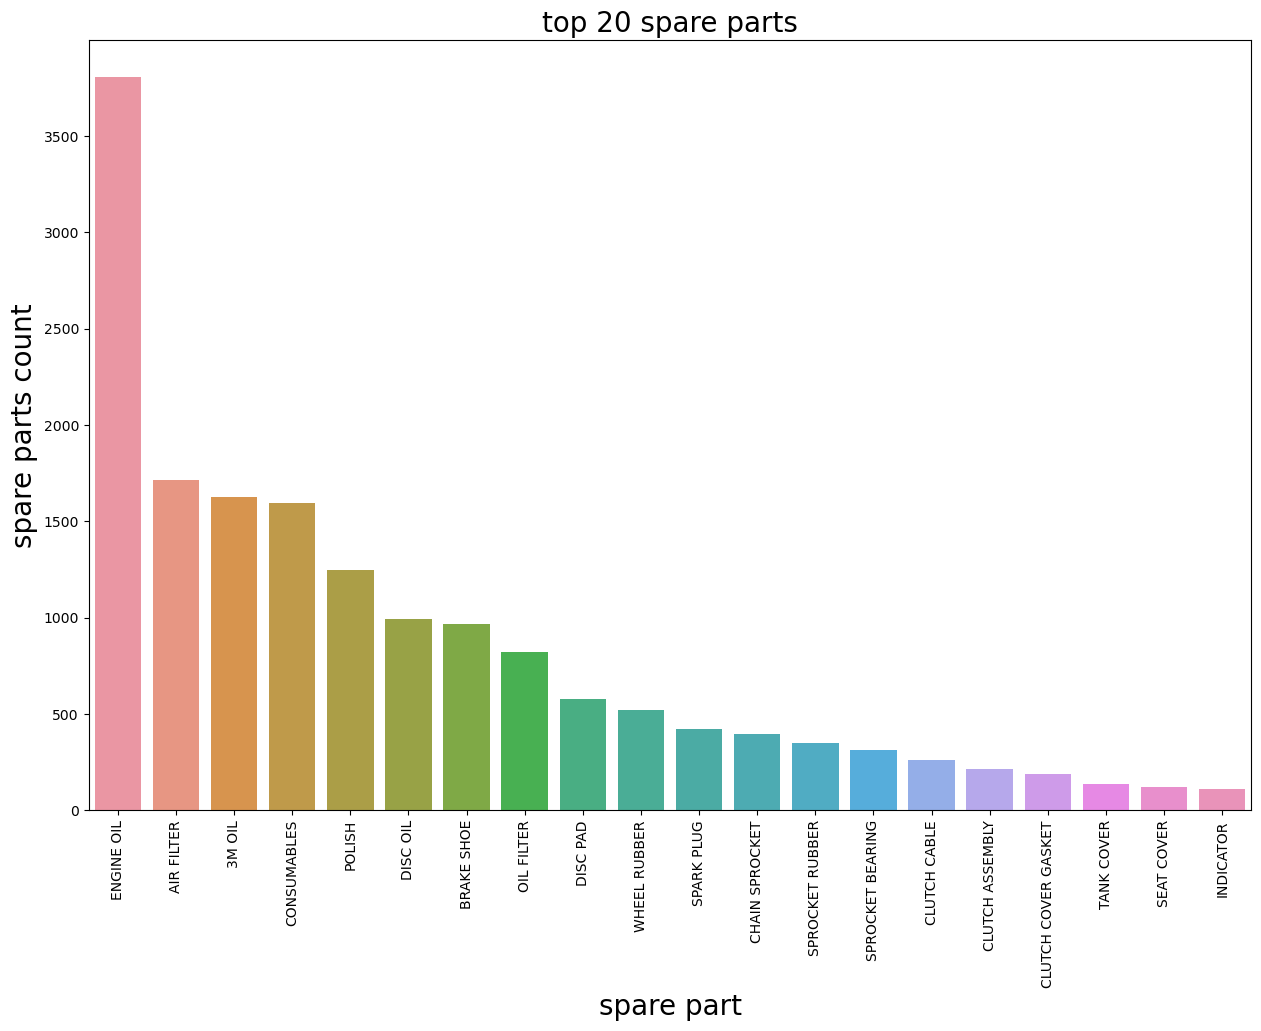

In [35]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Create the countplot
sns.countplot(data=data, x='spare_part',
              order=data['spare_part'].value_counts().index[:20],
              ax=ax)

# Set titles and labels with customized fontsizes
ax.set_title('top 20 spare parts', fontsize=20)
ax.set_ylabel('spare parts count', fontsize=20)
ax.set_xlabel('spare part', fontsize=20)

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()


In [36]:
# grouping by vehicle_model

vm_grouped_data = data.groupby(['vehicle_model'])['spare_part'].count().reset_index()
vm_grouped_data.rename(columns={'spare_part': 'count'}, inplace=True)
vm_grouped_data = vm_grouped_data.sort_values(by='count', ascending=False)
vm_grouped_data

,vehicle_model,count
12,BAJAJ PULSAR 150,6505
2,BAJAJ AVENGER STREET 220,3058
14,BAJAJ PULSAR 220,1985
18,BAJAJ PULSAR NS 200,1706
13,BAJAJ PULSAR 180,1704
5,BAJAJ CT 100,1119
7,BAJAJ DISCOVER 125,1028
0,BAJAJ AVENGER STREET,767
11,BAJAJ PLATINA,662
23,BAJAJ V150,524


In [37]:
# grouping by spare part
sp_grouped_data = data.groupby(['spare_part'])['vehicle_model'].count().reset_index()
sp_grouped_data.rename(columns={'vehicle_model': 'count'}, inplace=True)
sp_grouped_data = sp_grouped_data.sort_values(by='count', ascending=False)
sp_grouped_data

,spare_part,count
128,ENGINE OIL,3807
10,AIR FILTER,1715
3,3M OIL,1628
91,CONSUMABLES,1595
299,POLISH,1245
...,...,...
233,LEVER BOLT,1
234,LEVER RUBBER,1
237,LIGHTING COIL,1
244,MAGNET ASSEMBLY,1


In [38]:
data.date.nunique()

553

In [39]:
sp_grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 128 to 431
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   spare_part  432 non-null    object
 1   count       432 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [40]:
sp_grouped_data.shape[0]

432

In [41]:
sp_grouped_data[sp_grouped_data['count']>1].shape[0]

289

In [42]:
sp_grouped_data[sp_grouped_data['count']>10].shape[0]

129

In [43]:
sp_grouped_data[sp_grouped_data['count']>=100].shape[0]

23

In [44]:
# setting date as index column
data_indexed = data.set_index('date')
data_indexed.head()

,vehicle_model,spare_part
date,,
2017-05-30,BAJAJ AVENGER STREET 220,ENGINE OIL
2017-05-31,BAJAJ PULSAR NS 200,ENGINE OIL
2017-05-31,BAJAJ PULSAR NS 200,POLISH
2017-05-31,BAJAJ PULSAR NS 200,CONSUMABLES
2017-05-31,BAJAJ PULSAR NS 200,COOLANT OIL


In [45]:
# resampling
weekly_data_indexed = data_indexed[['spare_part']].resample('W').count()
weekly_data_indexed.shape

(84, 1)

In [46]:
weekly_data_indexed.head()

,spare_part
date,
2017-06-04,116
2017-06-11,240
2017-06-18,253
2017-06-25,219
2017-07-02,197


<Figure size 1500x1000 with 0 Axes>

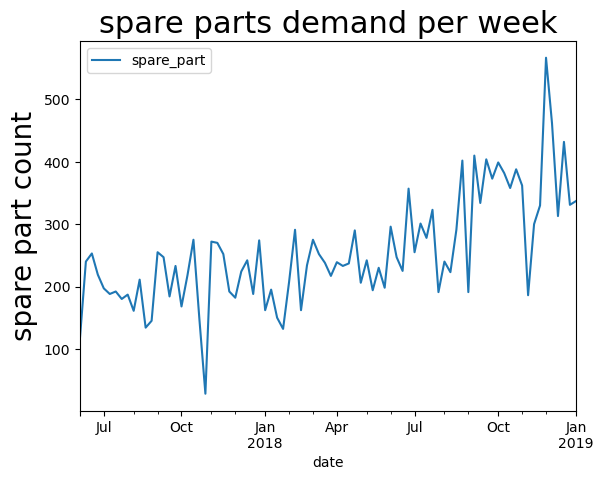

In [47]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Plot the weekly data 
weekly_data_indexed.plot()

# Set the title and labels with customized fontsizes
plt.title('spare parts demand per week', fontsize=22)
plt.ylabel('spare part count', fontsize=20)

# Show the plot
plt.show()


## Time Series Analysis

Analyzing the spare parts demand over time. 

I will be exploring following statistical techniques over the above data to understand overall pattern and behaviour of the inventory data.

- Time Downsampling
- Moving Average with rolling window
- Cummulative mean with expanding window
- Exponential Weighted Moving Average
- Time series stationarity

### Time Downsampling

In above steps, I resampled the data on weekly level. Let's see the demand of spare parts on monthly level.

In [48]:
monthly_data_indexed = weekly_data_indexed.resample('M').sum()

monthly_data_indexed.head()

,spare_part
date,
2017-06-30,828
2017-07-31,944
2017-08-31,651
2017-09-30,919
2017-10-31,836


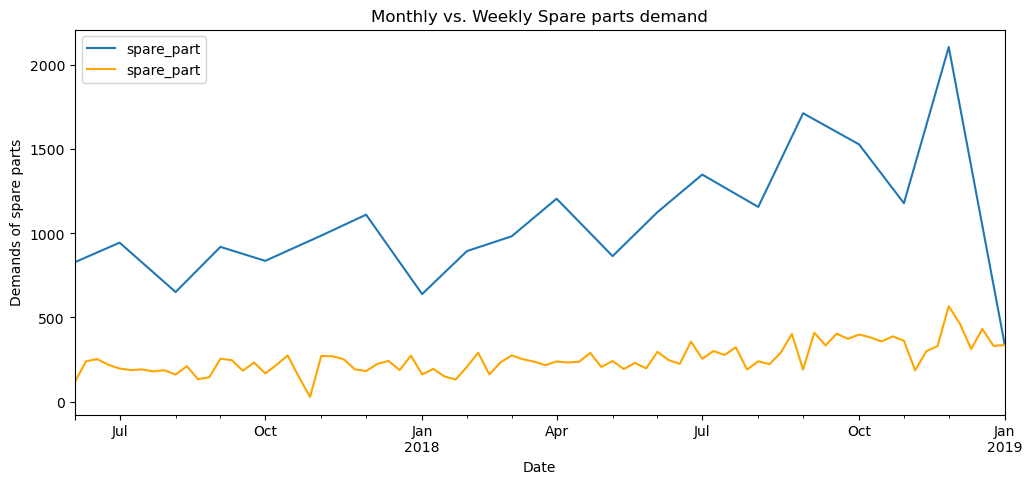

In [49]:
#plot the weekly demand and monthly demand on same view

fig, ax = plt.subplots(figsize=(12, 5))
# Plot the down sampled
monthly_data_indexed.plot(ax=ax, label='Monthly Demand')

# Plot the upsampled data 
weekly_data_indexed.plot(ax=ax, label='Weekly Demand', color='orange')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Demands of spare parts')
ax.set_title('Monthly vs. Weekly Spare parts demand')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

The monthly demands seems less fluctuating.

### Moving Average rolling window

Let's apply some smoothing techniques to understand overall behaviour the data.

In [50]:
weekly_data_indexed.columns

Index(['spare_part'], dtype='object')

In [51]:
#define window size of 4 weeks -> Monthly window
window = 4
weekly_data_indexed['4W_MA'] = weekly_data_indexed['spare_part'].rolling(window).mean()


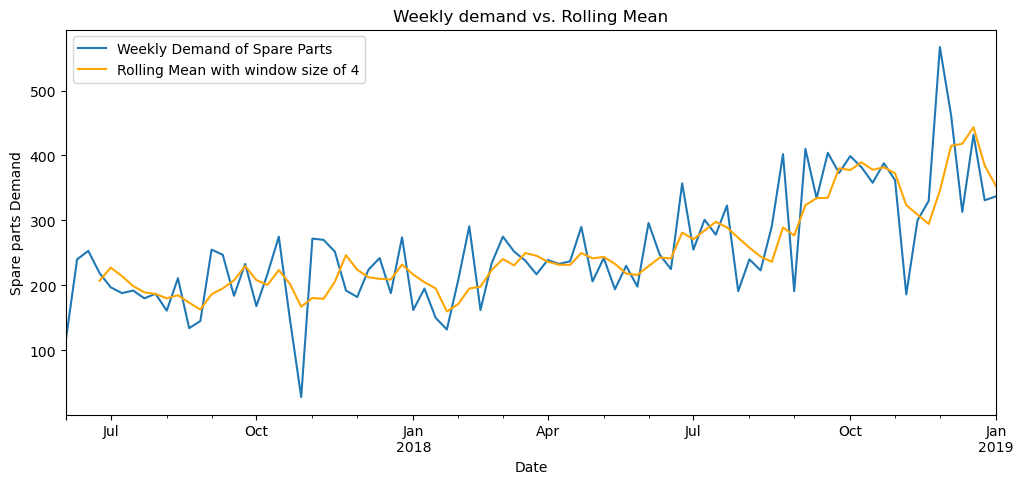

In [52]:
fig, ax = plt.subplots(figsize=(12, 5))
# weekly demand
weekly_data_indexed['spare_part'].plot(ax=ax, label='Weekly Demand of Spare Parts')

# MA with window size 4
weekly_data_indexed['4W_MA'].plot(ax=ax, label='Rolling Mean with window size of 4', color='orange')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Spare parts Demand')
ax.set_title('Weekly demand vs. Rolling Mean')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')
plt.show()

### Cumulative mean with expanding window

This can be helpful for understanding trends and pattern in the data over time.

In [53]:
#append cummulative mean over min period = 4 weeks
weekly_data_indexed['4W_CM'] = weekly_data_indexed['spare_part'].expanding(min_periods=4).mean()
weekly_data_indexed.head(10)

,spare_part,4W_MA,4W_CM
date,,,
2017-06-04,116,NaN,NaN
2017-06-11,240,NaN,NaN
2017-06-18,253,NaN,NaN
2017-06-25,219,207.00,207.000000
2017-07-02,197,227.25,205.000000
2017-07-09,188,214.25,202.166667
2017-07-16,192,199.00,200.714286
2017-07-23,180,189.25,198.125000
2017-07-30,187,186.75,196.888889


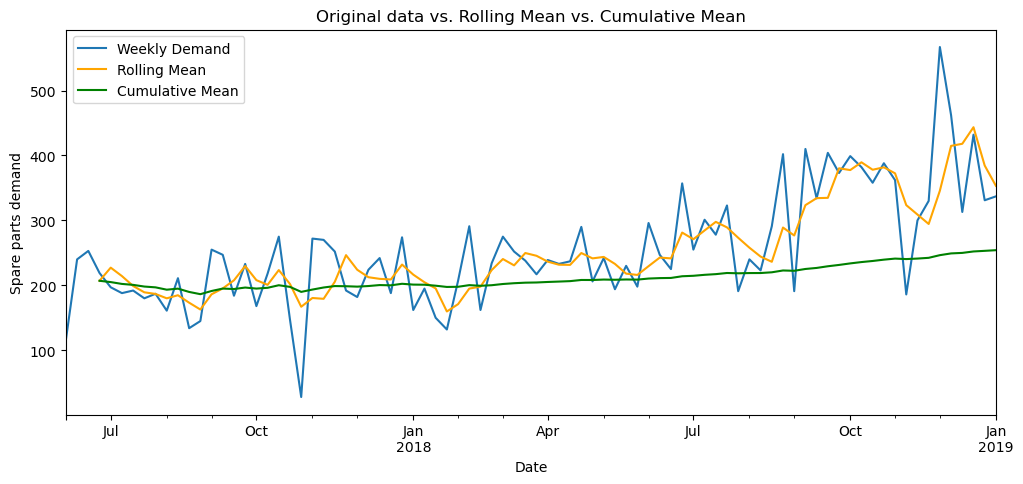

In [54]:
#plot the final df
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the data
weekly_data_indexed['spare_part'].plot(ax=ax, label='Weekly Demand')

# Plot the rolling mean
weekly_data_indexed['4W_MA'].plot(ax=ax, label='Rolling Mean', color='orange')

# Plot the  cumulative mean
weekly_data_indexed['4W_CM'].plot(ax=ax, label='Cumulative Mean', color='green')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Spare parts demand')
ax.set_title('Original data vs. Rolling Mean vs. Cumulative Mean')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')
plt.show()


Cumulative means seems somewhat stationary over time. But we need to investigate more.

### Time Series Stationarity

A time series is stationary if the mean and variance are fixed between two equidistance points.

Most the models like ARIMA and it's submodels need the stationary time series data.

Let's check if our data has some trend/seasonality or it is stationary. For stationarity check we can conduct augmented dickey fuller test.


In [55]:
from statsmodels.tsa.stattools import adfuller

In [56]:
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(weekly_data_indexed['spare_part'], autolag='AIC')

#covert into dataframe
dfout = pd.Series(dftest[0:4], index=['ADF test statistic','p-value','# lags used','# observations'])


for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Airline Data
ADF test statistic      -1.187627
p-value                  0.678896
# lags used              4.000000
# observations          79.000000
critical value (1%)     -3.515977
critical value (5%)     -2.898886
critical value (10%)    -2.586694
dtype: float64


Here we have a very high p-value at 0.68, which provides weak evidence against the null hypothesis, and so we <em>fail to reject</em> the null hypothesis, and decide that our dataset is not stationary.

#### Differencing

**Let's trying to make the series stationary**

We can use first order of differencing to make it stationary.

In [57]:
from statsmodels.tsa.statespace.tools import diff

weekly_data_indexed['spare_part_diff'] = diff(weekly_data_indexed['spare_part'], k_diff=1)

weekly_data_indexed.head(5)

,spare_part,4W_MA,4W_CM,spare_part_diff
date,,,,
2017-06-04,116,NaN,NaN,NaN
2017-06-11,240,NaN,NaN,124.0
2017-06-18,253,NaN,NaN,13.0
2017-06-25,219,207.00,207.0,-34.0
2017-07-02,197,227.25,205.0,-22.0


In [58]:
weekly_data_indexed = weekly_data_indexed[['spare_part', 'spare_part_diff']]

In [59]:
weekly_data_indexed.head()

,spare_part,spare_part_diff
date,,
2017-06-04,116,NaN
2017-06-11,240,124.0
2017-06-18,253,13.0
2017-06-25,219,-34.0
2017-07-02,197,-22.0


<AxesSubplot:title={'center':'First order differencing'}, xlabel='date'>

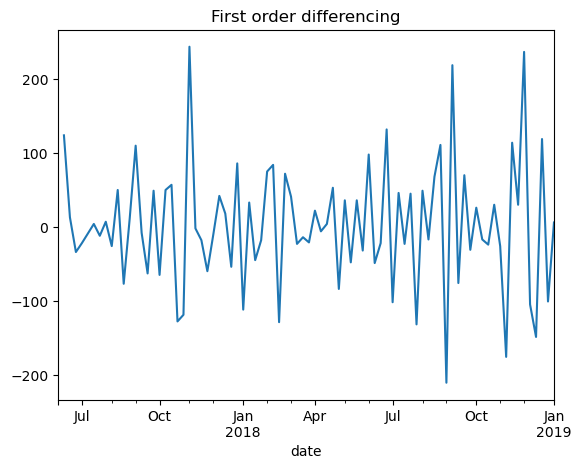

In [60]:
weekly_data_indexed['spare_part_diff'].plot(title="First order differencing")

Now check for stationarity.

In [61]:
#drop first NaN entry
weekly_data_indexed = weekly_data_indexed.dropna()

In [62]:
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(weekly_data_indexed['spare_part_diff'], autolag='AIC')

#covert into dataframe
dfout = pd.Series(dftest[0:4], index=['ADF test statistic','p-value','# lags used','# observations'])


for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Airline Data
ADF test statistic     -7.668082e+00
p-value                 1.620944e-11
# lags used             3.000000e+00
# observations          7.900000e+01
critical value (1%)    -3.515977e+00
critical value (5%)    -2.898886e+00
critical value (10%)   -2.586694e+00
dtype: float64


After first order differencing, the series seems now stationarity. The resultant series has `p-value` less than `5%`. 

## Time Series Forecasting

Since we are done with Analysis of our data. We also checked for stationarity and then we introduced first order differencing to make the time series stationary.

We can now move ahead for modeling and forecasting for future dates.

We have a lot of options while doing model selection like we can use Auto Regression(AR), Autoregressive Moving Average(ARMA) or Autoregressive Integreted Moving Average(ARIMA).

For time being I am using Triple Exponential Smoothing for setting the base line and the SARIMA model to get better result.



### Train/Test Split

For evaluating the model's performance it is crucial to evaluate it on unseen data. We can divide our data into train and test part. We can use train part for model's tranining and test part for model evaluation.

I am dividing the whole data into test and train such that test data has last 16 weeks points i.e last 2 months.

In [63]:
X = weekly_data_indexed

# Calculate the split point based on an 80:20 ratio
split_point = 16

# Split the data into train and test sets
train_data = X[:-split_point]
test_data = X[-split_point:]

# print the lengths of the train and test sets
print('Train data length:', len(train_data))
print('Test data length:', len(test_data))


Train data length: 67
Test data length: 16


### Forecasting with Holt's-Winter method


This method is another name of Triple Exponential Smoothing. It takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

#### Fitting the model

In [64]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['spare_part'], trend='mul', seasonal='add', seasonal_periods=26).fit()


### Evaluating against test set


In [65]:
test_predictions = fitted_model.forecast(len(test_data))

In [66]:
test_predictions

2018-09-23    287.365340
2018-09-30    266.162666
2018-10-07    287.908948
2018-10-14    318.299944
2018-10-21    281.247632
2018-10-28    179.086739
2018-11-04    317.783726
2018-11-11    292.617434
2018-11-18    301.774214
2018-11-25    255.678607
2018-12-02    299.736309
2018-12-09    312.607961
2018-12-16    316.200137
2018-12-23    332.565825
2018-12-30    317.422801
2019-01-06    295.031927
Freq: W-SUN, dtype: float64

#### Plot test and train data

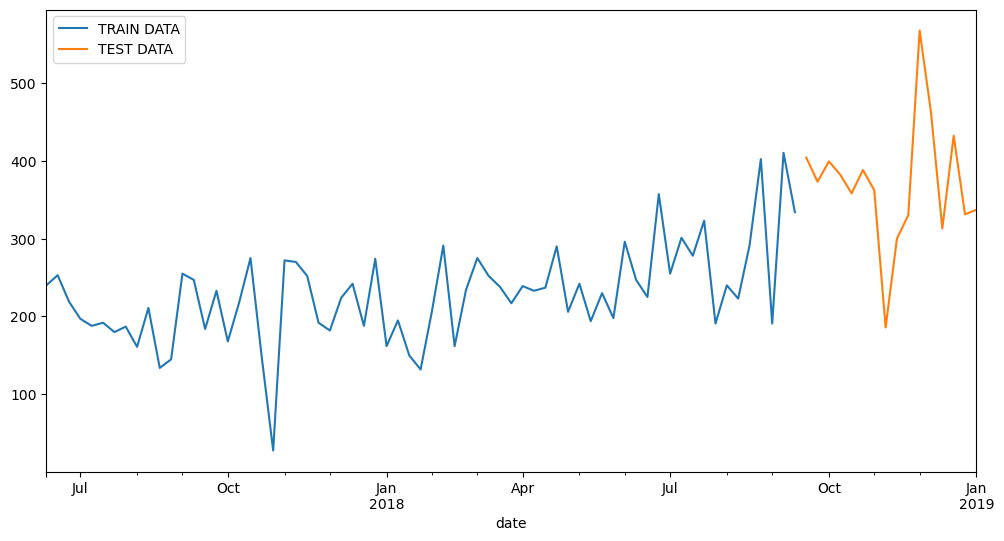

In [67]:
train_data['spare_part'].plot(legend=True, label='TRAIN DATA')
test_data['spare_part'].plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)

### Plot Actual vs Predicted values

<AxesSubplot:xlabel='date'>

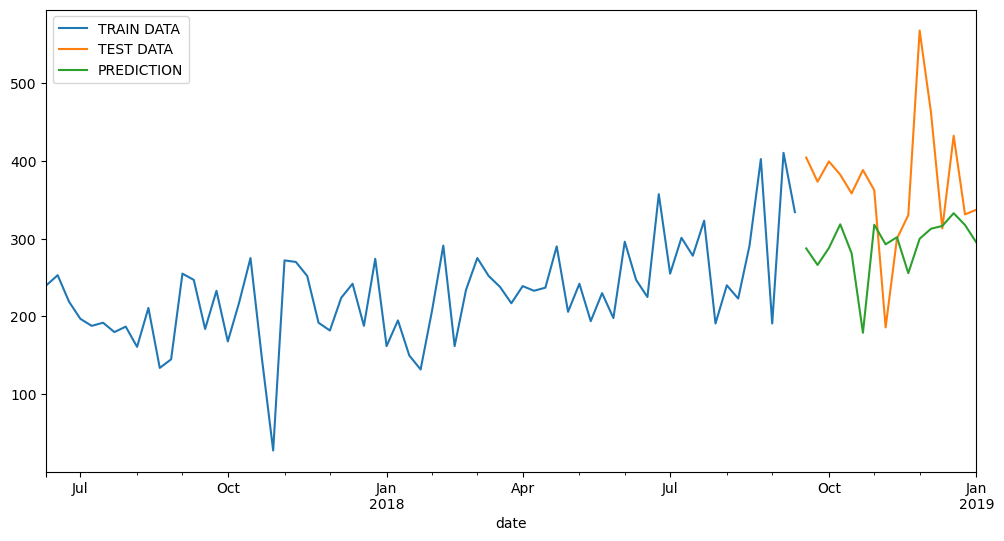

In [68]:
train_data['spare_part'].plot(legend=True, label='TRAIN DATA')
test_data['spare_part'].plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)
test_predictions.plot(legend=True, label='PREDICTION')

### Evalution Metrics

Since this is a type of regression problem we can use regression metrics like *Mean Squared Error(MSE)* or *Root Mean Squared Error(RMSE)* or *Mean Absolute Error(MAE)*

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [70]:
mae_error = mean_absolute_error(test_data['spare_part'], test_predictions)

print(f"Mean absolute error of the above model is {mae_error}")

Mean absolute error of the above model is 92.85583501494679


In [71]:
mse_error = mean_squared_error(test_data['spare_part'], test_predictions)

print(f"Mean squared error of the above model is {mse_error}")

Mean squared error of the above model is 13462.03413884085



### Seasonal Autoregressive Integreted Moving Average(SARIMA)


It's an extension of the ARIMA model that includes additional components to capture seasonality in time series data. SARIMA models are particularly useful for analyzing and forecasting data with recurring patterns that repeat over fixed intervals.

SARIMA models build upon the concepts of ARIMA models, with the addition of seasonal components:

1. **Seasonal AutoRegressive (SAR) Component**: This component captures the relationship between the current value and past values at the same seasonal lag. It's similar to the AR component but operates over the seasonal interval.

2. **Seasonal Integrated (SI) Component**: Just like the non-seasonal integrated component in ARIMA, this component accounts for differencing the series at the seasonal interval to achieve seasonal stationarity.

3. **Seasonal Moving Average (SMA) Component**: This component captures the relationship between the current value and past error terms at the same seasonal lag. It's similar to the MA component but operates over the seasonal interval.

A SARIMA(p, d, q) × (P, D, Q, s) model is defined by these components:

- $p$ is the order of the non-seasonal AutoRegressive (AR) component.
- $d$ is the degree of non-seasonal differencing.
- $q$ is the order of the non-seasonal Moving Average (MA) component.
- $P$ is the order of the seasonal AutoRegressive (SAR) component.
- $D$ is the degree of seasonal differencing.
- $Q$ is the order of the seasonal Moving Average (SMA) component.
- $s$ is the number of time steps in each seasonal period.

#### Error/Trend/Seasonality Decomposition

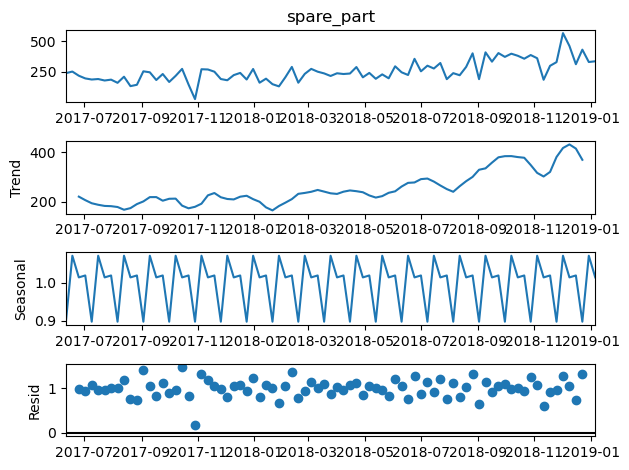

In [72]:


from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(weekly_data_indexed['spare_part'], model='mul', period=4)
result.plot();

**Look at the amplitude of sesonality**

In [73]:
max(result.seasonal), min(result.seasonal)

(1.0701381601723423, 0.897792896554129)

The apmplitude of the sesonality curve seems too low, so we can ignore the sesonality in the time series.

#### Selecting SARIMA orders

For getting optimal values of SARIMA orders i.e (p, d, q)X(P, D, Q) we can use heuristic search. or we can also use some third party library for it.

In [74]:
import pandas as pd
import numpy as np
%matplotlib inline
!pip install pmdarima


# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders


In [75]:
auto_arima(train_data['spare_part'], seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   67
Model:               SARIMAX(5, 1, 1)   Log Likelihood                -359.331
Date:                Wed, 24 Apr 2024   AIC                            734.662
Time:                        15:15:42   BIC                            752.179
Sample:                    06-11-2017   HQIC                           741.584
                         - 09-16-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6810      1.212      1.387      0.165      -0.694       4.056
ar.L1         -0.0276      0.155     -0.178      0.859      -0.332       0.277
ar.L2         -0.0716      0.162     -0.442      0.659      -0.389       0.246
ar.L3          0.0358      0.172      0.208      0.835      -0.301       0.373
ar.L4         -0.0262      0.187     -0.140      0.888      -0.392       0.340
ar.L5          0.0062      0.178      0.035      0.972      -0.343       0.355
ma.L1         -0.9798      0.228     -4.300      0.000      -1.426      -0.533
sigma2      3006.4263    607.952      4.945      0.000    1814.863    4197.990
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 3.49
Prob(Q):                              0.86   Prob(JB):                         0.17
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We need to which conbination leads to minimum AIC score. Based on this score we can decide the final order of our model.

#### Fitting the model

In [76]:
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults

In [77]:
model = SARIMAX(train_data['spare_part'],order=(5,1,1), seasonal_order=(1, 0, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          spare_part   No. Observations:                   67
Model:             SARIMAX(5, 1, 1)x(1, 0, [], 12)   Log Likelihood                -360.144
Date:                             Wed, 24 Apr 2024   AIC                            736.289
Time:                                     15:15:43   BIC                            753.806
Sample:                                 06-11-2017   HQIC                           743.210
                                      - 09-16-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1210      0.252     -0.480      0.631      -0.616       0.373
ar.L2         -0.1434      0.235     -0.611      0.541      -0.603       0.317
ar.L3          0.0142      0.240      0.059      0.953      -0.455       0.484
ar.L4         -0.0716      0.207     -0.345      0.730      -0.478       0.335
ar.L5          0.0308      0.218      0.141      0.888      -0.397       0.459
ma.L1         -0.8362      0.208     -4.013      0.000      -1.245      -0.428
ar.S.L12       0.2093      0.177      1.185      0.236      -0.137       0.555
sigma2      3113.0288    542.104      5.742      0.000    2050.524    4175.534
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.86   Prob(JB):                         0.73
Heteroskedasticity (H):               1.31   Skew:                            -0.02
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

In [79]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_data['spare_part'][i]}")

predicted=265.2703224, expected=404
predicted=315.8354313, expected=373
predicted=289.1850035, expected=399
predicted=309.0156824, expected=382
predicted=284.0413398, expected=358
predicted=287.7793064, expected=388
predicted=287.6042673, expected=362
predicted=300.979177 , expected=186
predicted=323.8665648, expected=300
predicted=280.4689053, expected=330
predicted=325.8033284, expected=567
predicted=310.0098858, expected=462
predicted=295.6928918, expected=313
predicted=306.1789584, expected=432
predicted=300.6643064, expected=331
predicted=304.7982798, expected=337


#### Plot the predictions

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Weekly Demand')]

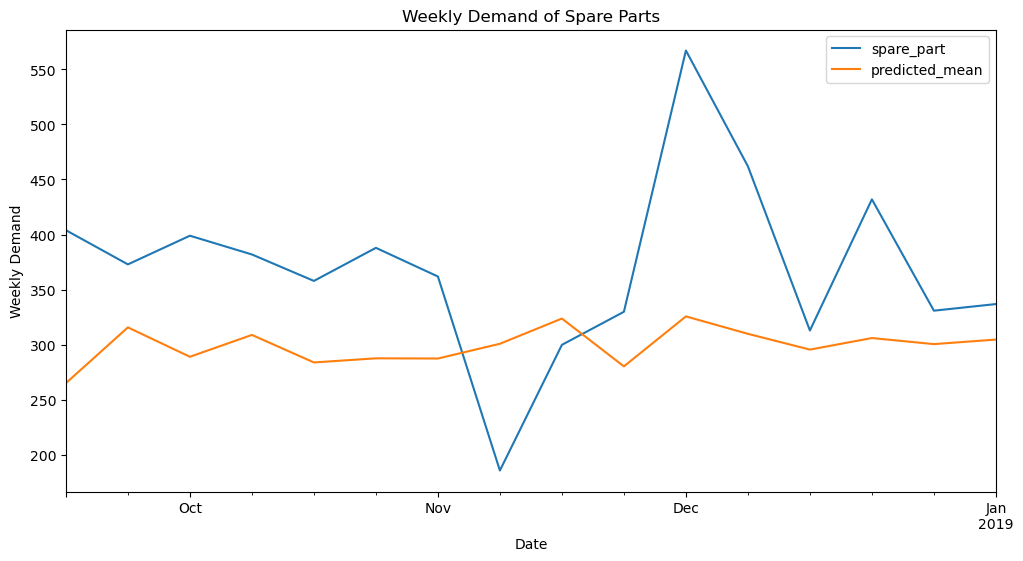

In [80]:
# Plot predictions against known values
title = 'Weekly Demand of Spare Parts'
ylabel='Weekly Demand'
xlabel='Date'

ax = test_data['spare_part'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### Model's Evaluation

To evaluate the model's performance let's see how the model is performing on the test set that we splitted out from whole dataset.

We can forcast for test points and the we can plot the actual test points and compare the model predictions visually and using some regression metrics.

In [81]:
from sklearn.metrics import mean_squared_error


error = mean_squared_error(test_data['spare_part'], predictions)
print(f'SARIMA(2,0,1,12) MSE Error: {error:11.10}')

SARIMA(2,0,1,12) MSE Error:  11034.7631


#### Forecast for next 16 weeks

So far we splitted the dataset into train and test set. We fitted our SARIMA model over train data and evaluated the performance on test data.

Now we can use the same strategy to forecast for future points. We can train the model on all data and then forecast the values for future points.



In [82]:
model = SARIMAX(weekly_data_indexed['spare_part'],order=(5,1,1), seasonal_order=(1, 0, 0, 12))

results = model.fit()
fcast = results.predict(len(weekly_data_indexed),len(weekly_data_indexed)+15,typ='levels').rename('SARIMA(5,1,1)(1,0,0,12) Forecast')

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Weekly Demand')]

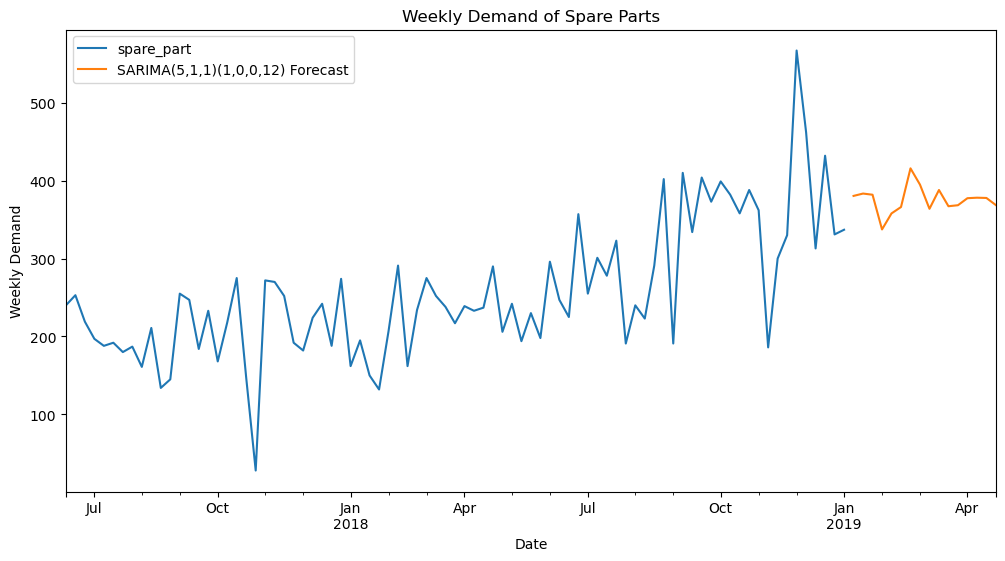

In [83]:
# Plot predictions against known values
# Plot predictions against known values
title = 'Weekly Demand of Spare Parts'
ylabel='Weekly Demand'
xlabel='Date'

ax = weekly_data_indexed['spare_part'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

So far we analyzed the data in univariate fashion like we aggregated the spare parts count from the inventory data irrespective of the two wheeler models.

We assumed the the count of spare parts required for each model will be same and it does not depend on model of that bike.

Let's explore the multivariate analysis where we also induct the two wheelers model into account.


## Induct eXogenous variable in SARIMAX model


Transform the dataset such that for each date we have distinct number of bikes and the spare parts count. It seems like if you have more number of bikes you will need to have more spare parts count.

In [84]:
# grouping by vehicle_model

vm_grouped_data = data.groupby(['date','vehicle_model'])['spare_part'].count().reset_index()
vm_grouped_data.rename(columns={'spare_part': 'count'}, inplace=True)
vm_grouped_data = vm_grouped_data.sort_values(by='count', ascending=False).set_index('date')
vm_grouped_data

,vehicle_model,count
date,,
2018-11-30,BAJAJ PULSAR 150,61
2018-09-17,BAJAJ PULSAR 150,56
2017-10-12,BAJAJ PULSAR 150,49
2017-07-08,BAJAJ PULSAR 150,48
2018-10-27,BAJAJ PULSAR 150,48
...,...,...
2018-08-24,BAJAJ PULSAR 180,1
2017-08-10,BAJAJ AVENGER STREET 220,1
2017-12-09,BAJAJ DISCOVER 150,1


In [85]:
vm_grouped_data = vm_grouped_data['count'].resample('W').sum()


In [86]:
vm_grouped_data.head()

date
2017-06-04    116
2017-06-11    240
2017-06-18    253
2017-06-25    219
2017-07-02    197
Freq: W-SUN, Name: count, dtype: int64

## Conclusion
SARIMA was the best model for both the data sources. More complex modelling would lead to overfitting so i have kept p and q values below order 5. We also could have got better results if there was a lot of data at our disposal. Also, data is almost similar to random data which we get to know from observing the acf and pacf plots. The same procedures can be implemented for rest of the vehicle models and their spare parts but as shown data is quiet low for time series forecasting of even the top spare parts. Different ML models such as linear regression, xgboost and DL model - LSTM were tried but they gave worst results. With this we have come to an end of this project. Decent results were achieved and with a little more fine tuning can be implemented in real world scenario. 
Thank you.